In [15]:
import pandas as pd
import numpy as np

df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Decision Tree Accuracy: 0.8439024390243902 



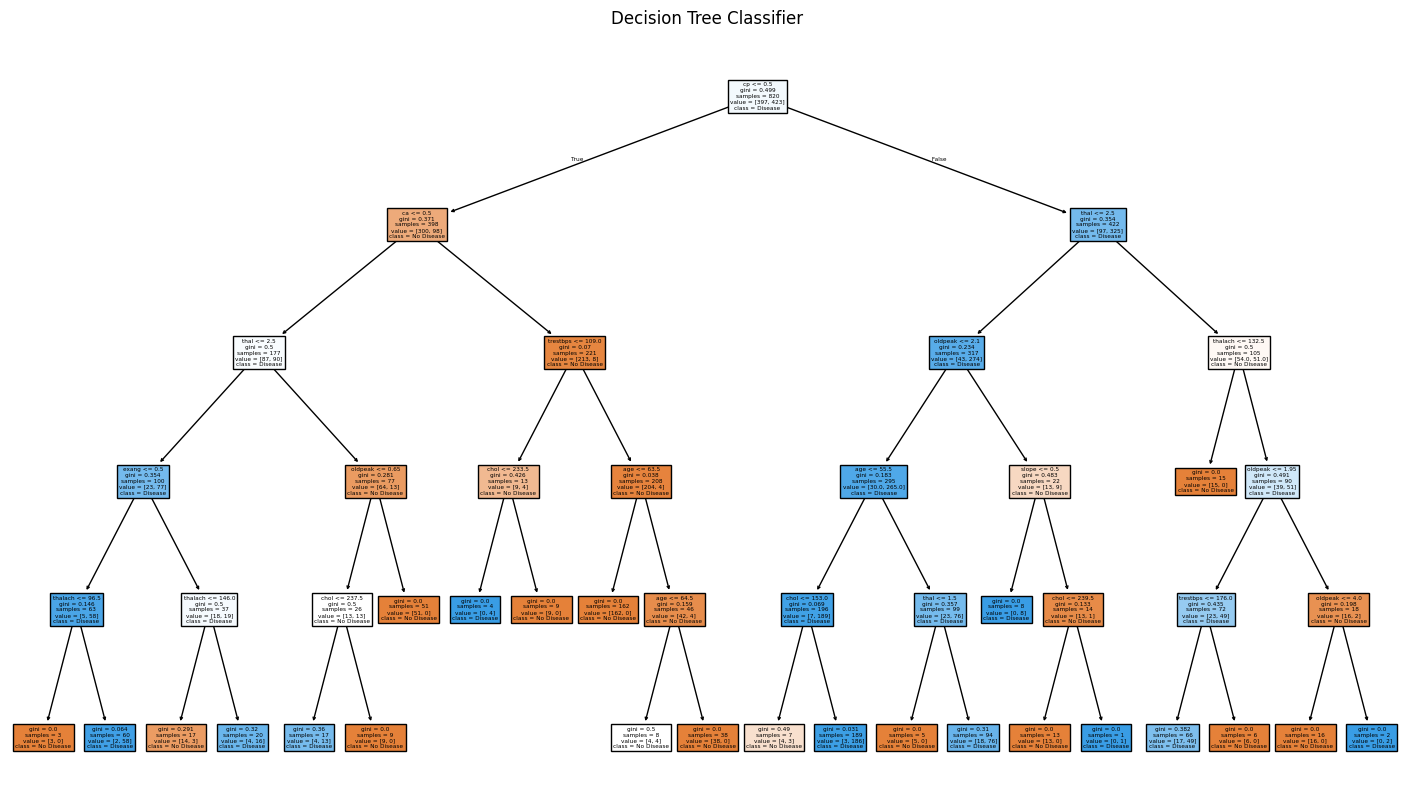

In [9]:
# 1.Train a Decision Tree Classifier and visualize the tree

import matplotlib.pyplot as plt

# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score
# # from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Spliting the data
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Decision Tree Classifier
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

# To evaluate the accuracy
y_acc = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_acc), "\n")

# Visualize the tree
plt.figure(figsize=(18,10))
plot_tree(dtree, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Classifier")
plt.show()

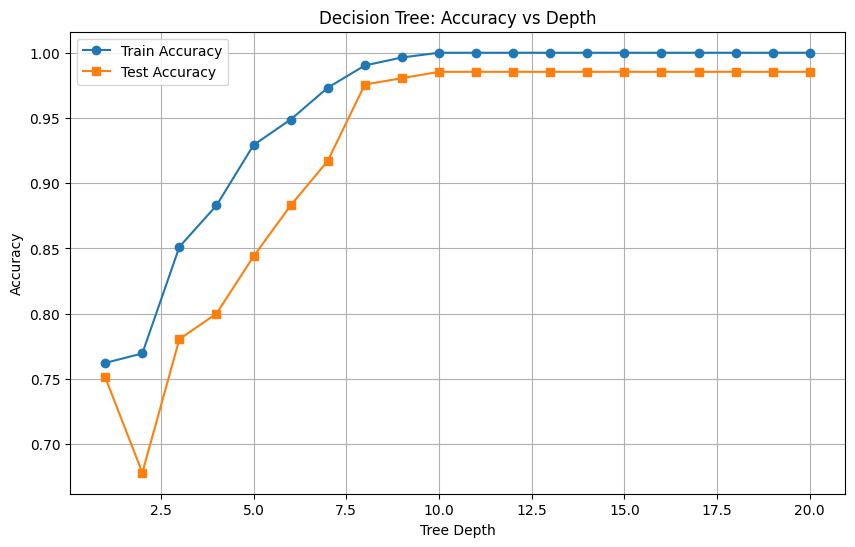

In [7]:
# 2.Analyze overfitting and control tree depth

depths = range(1, 21)
train_accuracies = []
test_accuracies = []

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, model.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, model.predict(X_test)))

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label="Train Accuracy", marker='o')
plt.plot(depths, test_accuracies, label="Test Accuracy", marker='s')
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.title("Decision Tree: Accuracy vs Depth")
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# 3.Train a Random Forest and compare accuracy

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Accuracy
dtree_acc = accuracy_score(y_test, dtree.predict(X_test))
rfc_acc = accuracy_score(y_test, rfc.predict(X_test))

# Cross-validation scores
dtree_cv = cross_val_score(dtree, X, y, cv=5).mean()
rfc_cv = cross_val_score(rfc, X, y, cv=5).mean()

# Feature Importances
importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)

{
    "Decision Tree Accuracy": round(dtree_acc, 3),
    "Random Forest Accuracy": round(rfc_acc, 3),
    "Decision Tree CV Score": round(dtree_cv, 3),
    "Random Forest CV Score": round(rfc_cv, 3),
    "Top 5 Feature Importances": importances.head(5).to_dict()
}

# Train Random Forest
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

# Accuracy
dtree_acc = accuracy_score(y_test, dtree.predict(X_test))
rfc_acc = accuracy_score(y_test, rfc.predict(X_test))

print("Decision Tree Accuracy:", dtree_acc)
print("Random Forest Accuracy:", rfc_acc)

# Cross-validation scores
dtree_cv = cross_val_score(dtree, X, y, cv=5).mean()
rfc_cv = cross_val_score(rfc, X, y, cv=5).mean()

print("Decision Tree CV Score:", dtree_cv)
print("Random Forest CV Score:", rfc_cv)


Decision Tree Accuracy: 0.8439024390243902
Random Forest Accuracy: 0.9853658536585366
Decision Tree CV Score: 0.8907317073170733
Random Forest CV Score: 0.9970731707317073


Top 5 Important Features:
 cp         0.135072
ca         0.127327
thalach    0.122169
oldpeak    0.121905
thal       0.110518
dtype: float64


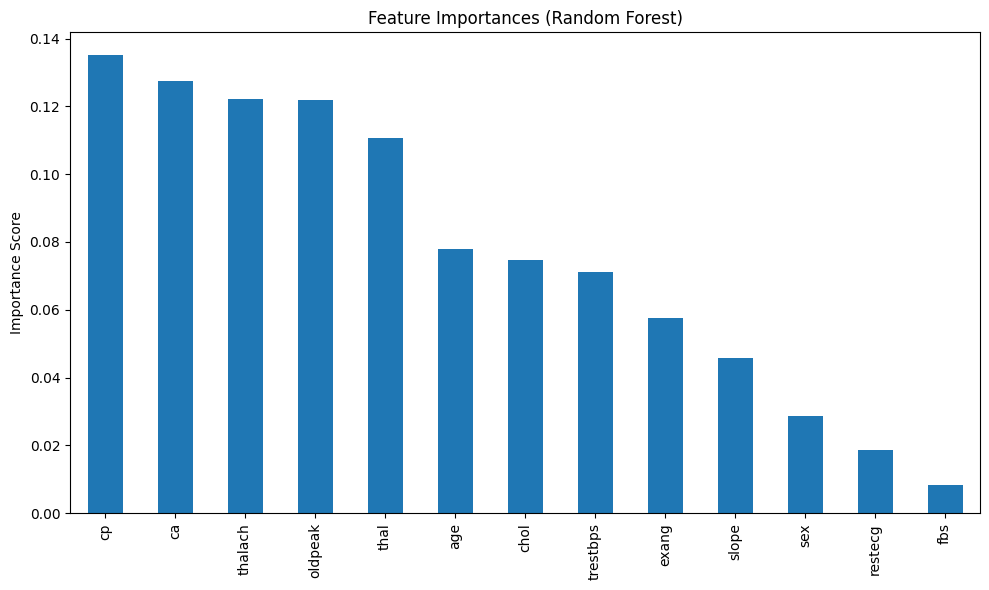

In [11]:
# 4.Interpret feature importances

# Feature Importance
importances = pd.Series(rfc.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top 5 Important Features:\n", importances.head())

# Plot
importances.plot(kind='bar', title="Feature Importances (Random Forest)", figsize=(10, 6))
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In [18]:
# 5.Evaluate using cross-validation

cv_scores = cross_val_score(model, X, y, cv=5)
print("Random Forest Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Random Forest Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean CV Accuracy: 1.0
